# Project Overview
In this project, you will employ techniques in data cleaning, imputation, analysis, and visualization to extract valuable insights for a business stakeholder.





![Description of the Image](https://images.pexels.com/photos/358319/pexels-photo-358319.jpeg?cs=srgb&dl=pexels-pixabay-358319.jpg&fm=jpg)






## Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# Importing Relevant Libraries

In this section, I will import the necessary libraries required for data analysis and visualization.

1. **Pandas**: For data manipulation and analysis.
2. **NumPy**: For numerical operations on arrays.
3. **Seaborn**: For enhanced data visualization.
4. **Matplotlib**: For basic plotting.
5. **Warnings**: To filter out warnings that may clutter the output.

Now, let's import these libraries.

In [128]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In this section, I load the dataset into a DataFrame using Pandas. The dataset, named **AviationData.csv**, is downloaded from Kaggle. I will display the first few rows of the DataFrame to get an overview of the data structure and contents.

- **File Encoding**: We are using `iso-8859-1` encoding to properly handle any special characters in the dataset.
- **Source**: The dataset is sourced from Kaggle. https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

In [130]:
# Load the dataset into a DataFrame
df = pd.read_csv('AviationData.csv', encoding='iso-8859-1')

# Display the first few rows of the DataFrame
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Checking the Shape of the DataFrame

In this section, I check the shape of the DataFrame to understand the dimensions of the dataset. The shape will provide information on the number of rows (observations) and columns (features) present in the dataset.


In [132]:
# Checking the shape of the DataFrame
df.shape


(88889, 31)

# Checking the Overall Information of the DataFrame

In this section, I will check the overall information of the DataFrame using the `info()` method. This will provide insights into the data types of each column, the number of non-null entries, and memory usage. This information is crucial for understanding the structure of the dataset and identifying any potential issues with missing values.


In [134]:
# Checking the overall information of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# Statistical Description of the DataFrame

In this section, I will generate a statistical description of the DataFrame using the `describe()` method. This will provide summary statistics for numerical columns, including count, mean, standard deviation, minimum, maximum, and quartile values. Analyzing these statistics is essential for understanding the distribution and central tendencies of the data, which can inform further analysis and decision-making.


In [136]:
# Generating a statistical description of the DataFrame
df.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# Checking the Available Column Names

In this section, I will check the available column names in the DataFrame using the `columns` attribute. This is important for understanding the structure of the dataset and for identifying the specific features available for analysis. Knowing the column names will help in selecting and manipulating data more effectively in subsequent stepss
.


In [138]:
# Checking the available column names
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# Data Preparation and Cleaning
### Replace dots with a space and strip whitespace from the column names

In [140]:
df.columns = df.columns.str.replace('.', ' ', regex=False).str.strip().str.title()
df.columns


Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'Far Description',
       'Schedule', 'Purpose Of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase Of Flight', 'Report Status',
       'Publication Date'],
      dtype='object')

# Data Preparation and Cleaning

In this section, I will clean the column names in the DataFrame by replacing dots with spaces and stripping any leading or trailing whitespace. This is done to enhance readability and ensure that the column names are more user-friendly for further analysis. The `str.replace()` method is used to replace dots, and `str.strip()` is applied to remove any unnecessary whitespace. Additionally, `str.title()` is used to convert the column names to title case for consistency.


In [142]:
# Replace dots with a space and strip whitespace from the column names
df.columns = df.columns.str.replace('.', ' ', regex=False).str.strip().str.title()

# Display the cleaned column names
df.columns


Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'Far Description',
       'Schedule', 'Purpose Of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase Of Flight', 'Report Status',
       'Publication Date'],
      dtype='object')

# Checking for Missing Values

In this section, I will check for any missing values in the DataFrame using the `isna().sum()` method. This will provide a count of missing values for each column, which is essential for understanding the data quality. Identifying missing values is a critical step in data preparation, as it informs the strategies for handling them, whether through imputation or removal.


In [144]:
# Checking for missing values in the DataFrame
df.isna().sum()



Event Id                      0
Investigation Type            0
Accident Number               0
Event Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport Code              38757
Airport Name              36185
Injury Severity            1000
Aircraft Damage            3194
Aircraft Category         56602
Registration Number        1382
Make                         63
Model                        92
Amateur Built               102
Number Of Engines          6084
Engine Type                7096
Far Description           56866
Schedule                  76307
Purpose Of Flight          6192
Air Carrier               72241
Total Fatal Injuries      11401
Total Serious Injuries    12510
Total Minor Injuries      11933
Total Uninjured            5912
Weather Condition          4492
Broad Phase Of Flight     27165
Report Status              6384
Publication Date          13771
dtype: i

# Identifying the Relevant Columns for Data Analysis

In this section, I will identify the relevant columns needed for the analysis. These columns contain crucial information regarding the aircraft accidents, such as the `Event Date`, `Location`, `Injury Severity`, `Aircraft Damage`, `Make`, and `Model`. By narrowing down the dataset to only the relevant columns, I can focus on the key aspects required to perform risk analysis and derive meaningful insights. 

The selected columns include information on the aircraft make and model, injury severities, weather conditions, and more.


In [146]:
# Identifying relevant columns for the analysis
relevant_columns = ['Event Id', 'Event Date', 'Location', 'Country',
                    'Injury Severity', 'Aircraft Damage', 'Make', 'Model',
                    'Amateur Built', 'Number Of Engines', 'Engine Type',
                    'Purpose Of Flight', 'Total Fatal Injuries',
                    'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
                    'Weather Condition']

# Creating a new DataFrame with only the relevant columns
df_relevant = df[relevant_columns]

# Display the first few rows of the filtered DataFrame
df_relevant.head()

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


# Checking Missing Values for the Relevant Columns

After filtering the dataset to include only the relevant columns, it is important to check for missing values. Identifying missing data is a crucial step in data cleaning, as it allows me to decide how to handle gaps in the dataset. Missing values can affect the quality of the analysis, so this step ensures that I am aware of the data quality issues before proceeding.


In [148]:
# Checking missing values in the relevant columns
df_relevant.isnull().sum()


Event Id                      0
Event Date                    0
Location                     52
Country                     226
Injury Severity            1000
Aircraft Damage            3194
Make                         63
Model                        92
Amateur Built               102
Number Of Engines          6084
Engine Type                7096
Purpose Of Flight          6192
Total Fatal Injuries      11401
Total Serious Injuries    12510
Total Minor Injuries      11933
Total Uninjured            5912
Weather Condition          4492
dtype: int64

# Dropping Missing Values for Key Columns

To ensure the integrity of the analysis, I will remove rows with missing values in key columns. The columns chosen for this operation are critical to understanding the nature and causes of accidents. For instance, columns such as 'Location', 'Injury Severity', 'Aircraft Damage', and 'Make' are essential for risk assessment, and missing data in these fields can skew the results. After dropping rows with missing values in these columns, I will check for any remaining missing values in the dataset.


In [150]:
# Columns that will drop missing values
drop_columns = ['Location', 'Country',
       'Injury Severity', 'Aircraft Damage',
       'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight',
       'Weather Condition']

# Dropping rows with missing values in the selected columns
df_relevant = df_relevant.dropna(subset=drop_columns)

# Checking for any remaining missing values
df_relevant.isnull().sum()


Event Id                      0
Event Date                    0
Location                      0
Country                       0
Injury Severity               0
Aircraft Damage               0
Make                          0
Model                         0
Amateur Built                 0
Number Of Engines             0
Engine Type                   0
Purpose Of Flight             0
Total Fatal Injuries       9386
Total Serious Injuries    10248
Total Minor Injuries       9525
Total Uninjured            4692
Weather Condition             0
dtype: int64

# Replacing Missing Values in Injury Columns

For the columns that record the number of injuries ('Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', and 'Total Uninjured'), I will replace missing values with zero. This approach assumes that if data on injuries is missing, no injuries occurred in the accident. By filling null values with 0, I ensure that the analysis is not skewed by missing data while maintaining the integrity of the dataset.


In [152]:
# Columns that need replacing the null values
replace_columns = ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']

# Replacing null values in relevant injury columns with 0
df_relevant[replace_columns] = df_relevant[replace_columns].fillna(0)

# Checking if there are any remaining null values
df_relevant.isnull().sum()


Event Id                  0
Event Date                0
Location                  0
Country                   0
Injury Severity           0
Aircraft Damage           0
Make                      0
Model                     0
Amateur Built             0
Number Of Engines         0
Engine Type               0
Purpose Of Flight         0
Total Fatal Injuries      0
Total Serious Injuries    0
Total Minor Injuries      0
Total Uninjured           0
Weather Condition         0
dtype: int64

# Formatting the Location Column

To ensure consistency and clarity in the `Location` column, I will standardize the formatting. This includes capitalizing the first letter of each word and ensuring that state abbreviatio') are in uppercase. This makes the data more uniform and easier to work with during analysis.


In [154]:
# Standardizing the 'Location' column
df_relevant['Location'] = df_relevant['Location'].str.title().str.replace(r',\s*(\w{2})$', lambda x: x.group(0).upper(), regex=True)

# Displaying the first few rows to confirm changes
df_relevant.head()
                                               

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"Moose Creek, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC
3,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
6,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC


## Converting 'Event Date' to Datetime Format

This section will convert the 'Event Date' column to a datetime format. This will allow us to perform time series analyses and extract specific date components easily.


In [156]:
# Convert the 'Event Date' column to datetime format
# We use pd.to_datetime() to ensure the column is in the correct format for date operations.
df_relevant['Event Date'] = pd.to_datetime(df_relevant['Event Date'], errors='coerce')

# Display the updated DataFrame to verify the conversion
df_relevant


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"Moose Creek, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC
3,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
6,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,CESSNA,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC
88647,20221011106098,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,CESSNA,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC
88661,20221018106153,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,BEECH,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC
88735,20221031106231,2022-10-29,"Houston, TX",United States,Minor,Substantial,STEPHEN J HOFFMAN,MS-500,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC


## Extracting the Year from the 'Event Date' Column

In this section, we will extract the year from the 'Event Date' column of the DataFrame `df_relevant` and create a new column named 'Year'. This will help us analyze trends over the years.
.


In [158]:
# Extract the year from the 'Event Date' column
# We use string slicing to get the first four characters representing the year.
df_relevant['Year'] = df_relevant['Event Date'].astype(str).str[:4]
# Display the updated DataFrame to verify the new 'Year' column has been added
df_relevant


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
0,20001218X45444,1948-10-24,"Moose Creek, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,1948
1,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,1962
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,1974
3,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1977
6,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,CESSNA,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88647,20221011106098,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,CESSNA,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2022
88661,20221018106153,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,BEECH,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88735,20221031106231,2022-10-29,"Houston, TX",United States,Minor,Substantial,STEPHEN J HOFFMAN,MS-500,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,2022


## Removing Data for Years Before 1962

In this section, we will filter out any entries from the DataFrame `df_relevant` that have a year earlier than 1962. Since the values in the 'Year' column are currently in string format, we will first convert them to numeric format to perform this filtering.


In [160]:
# Convert the 'Year' column to numeric format
# This ensures we can perform numerical comparisons. Invalid parsing will be set as NaN.
df_relevant['Year'] = pd.to_numeric(df_relevant['Year'], errors='coerce')

# Filter the DataFrame to remove entries with years before 1962
df_relevant = df_relevant[df_relevant['Year'] >= 1962]

# Display a random sample of 10 entries from the updated DataFrame
df_relevant.sample(n=10)


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
50636,20010530X01034,2001-05-27,"Kankakee, IL",United States,Fatal(1),Destroyed,Geertz,Zenith CH 200,Yes,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,2001
71173,20111210X64849,2011-12-10,"Surprise, AZ",United States,Fatal,Substantial,VANS,RV7 - A,Yes,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,2011
37946,20001207X04179,1995-08-04,"Fifield, WI",United States,Fatal(2),Destroyed,Piper,PA-28-181,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1995
39236,20001208X05382,1996-03-15,"Ulysses, KS",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1996
52697,20020604X00805,2002-06-01,"Navajo Dam, NM",United States,Non-Fatal,Substantial,Cessna,172E,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC,2002
65927,20090217X35840,2009-02-07,"Terrell, TX",United States,Non-Fatal,Substantial,PIPER,PA-28,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2009
34392,20001206X00574,1994-01-17,"Palmer, AK",United States,Fatal(1),Destroyed,Piper,PA-18-160,No,1.0,Reciprocating,Personal,1.0,1.0,0.0,0.0,VMC,1994
44343,20001211X10574,1998-07-07,"Beaumont, TX",United States,Non-Fatal,Substantial,Piper,PA-60-602P,No,2.0,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,1998
77708,20151220X51805,2015-12-20,"Winder, GA",United States,Fatal,Destroyed,BEECH,C24R,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,2015
56052,20040105X00010,2003-12-28,"Campobello, SC",United States,Fatal(1),Destroyed,Mooney,20F,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,2003


## Removing Outlier Years with a Count of 1

In this section, we will remove years from the DataFrame `df_relevant` that have only 1 occurrence. These years are considered outliers and may not be representative of the data trends we want to analyze.


In [162]:
# Count occurrences of each year
year_counts = df_relevant['Year'].value_counts()

# Identify years with counts greater than 1
years_to_keep = year_counts[year_counts > 1].index

# Filter the DataFrame to keep only those years
df_relevant = df_relevant[df_relevant['Year'].isin(years_to_keep)]

# Display a random sample of 10 entries from the updated DataFrame
df_relevant.sample(n=10)


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
46730,20001212X19386,1999-07-31,"Big Creek, ID",United States,Non-Fatal,Substantial,Piper,PA-18-150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1999
23376,20001213X28766,1989-07-02,"Tecumseh, MI",United States,Non-Fatal,Substantial,Cessna,182A,No,1.0,Reciprocating,Business,0.0,0.0,1.0,4.0,VMC,1989
75372,20140708X15409,2014-07-05,"Puyallup, WA",United States,Non-Fatal,Substantial,GLOBE,GC 1B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2014
80910,20171127X10340,2017-11-25,"Ebensburg, PA",United States,Non-Fatal,Substantial,PIPER,PA 34-220T,No,2.0,Reciprocating,Personal,0.0,0.0,4.0,0.0,VMC,2017
84699,20200427X62351,2020-04-25,"Enosburg, VT",United States,Non-Fatal,Substantial,Aeronca,7AC,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2020
45151,20001211X11325,1998-10-25,"Linden, NJ",United States,Fatal(1),Destroyed,Cessna,172N,No,1.0,Reciprocating,Personal,1.0,3.0,0.0,0.0,VMC,1998
29165,20001212X18102,1991-09-26,"Pearsall, TX",United States,Non-Fatal,Destroyed,Bell,47G-5A,No,1.0,Reciprocating,Aerial Observation,0.0,0.0,3.0,0.0,VMC,1991
8597,20001214X39937,1984-06-13,"Lone Wolf, OK",United States,Fatal(1),Destroyed,Champion,7GCAA,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,1984
52973,20020712X01111,2002-07-04,"Fairmont, MN",United States,Non-Fatal,Substantial,Hale,Kitfox Model III,Yes,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2002
33030,20001211X12510,1993-06-18,"Juneau, AK",United States,Non-Fatal,Substantial,Piper,PA-32-300,No,1.0,Reciprocating,Unknown,0.0,0.0,1.0,5.0,IMC,1993


## Replacing 'UNK' and 'Unk' Values with 'Unknown'

In this section, we will replace all instances of the values "UNK" and "Unk" in the DataFrame `df` with the string "Unknown". This helps standardize our data and ensures that all missing or unknown values are clearly labeled.
.


In [241]:
# Replace all occurrences of "UNK" and "Unk" with "Unknown"
df_relevant = df_relevant.replace(["UNK", "Unk"], "Unknown")

# Display a sample of the DataFrame to verify the replacements
df_relevant.sample(n=10)



,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
1617,20020917X02957,1982-06-19,"Duluth, MN",United States,Non-Fatal,Destroyed,Mooney,M20J,No,1.0,Reciprocating,Personal,0.0,1.0,2.0,0.0,IMC,1982
26745,20001212X24283,1990-09-29,"El Mirage, CA",United States,Non-Fatal,Substantial,Volksplane,WE-1,Yes,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,1990
50326,20010409X00724,2001-04-06,"Pearland, TX",United States,Non-Fatal,Substantial,Piper,PA-25-235,No,1.0,Reciprocating,Business,0.0,0.0,0.0,1.0,VMC,2001
74444,20131113X11809,2013-10-28,"Milo, OR",United States,Non-Fatal,Substantial,Bell,206B,No,1.0,Turbo Shaft,Aerial Observation,0.0,0.0,3.0,0.0,VMC,2013
17907,20001213X31122,1987-06-27,"Cambridge, MD",United States,Non-Fatal,Substantial,Cessna,195A,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1987
35370,20001206X01481,1994-06-25,"Utica, NE",United States,Non-Fatal,Destroyed,Mueller,Q2,Yes,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,VMC,1994
57439,20040910X01392,2004-09-05,"North Las Vegas, NV",United States,Non-Fatal,Substantial,Robinson,R22 Beta,No,1.0,Reciprocating,Instructional,0.0,1.0,1.0,0.0,VMC,2004
26127,20001212X23728,1990-07-23,"Apple Valley, CA",United States,Fatal(2),Destroyed,Piper,PA-28-151,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,1990
4683,20001214X43104,1983-05-16,"Gardner, KS",United States,Non-Fatal,Destroyed,Cessna,182P,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,VMC,1983
16308,20001213X35260,1986-11-12,"Pittsburgh, PA",United States,Non-Fatal,Substantial,Beech,BE18H,No,2.0,Reciprocating,Unknown,0.0,0.0,0.0,1.0,VMC,1986


## Standardizing Capitalization in Columns

In this section, we will standardize the capitalization in the 'Make', 'Purpose Of Flight', and 'Aircraft Damage' columns of the DataFrame `df_relevant`. We will convert the text in these columns to title case to ensure consistency.


In [166]:
# Apply title case to 'Make', 'Purpose Of Flight', and 'Aircraft Damage' columns
df_relevant[['Make', 'Purpose Of Flight', 'Aircraft Damage']] = df_relevant[['Make', 'Purpose Of Flight', 'Aircraft Damage']].apply(lambda col: col.str.title())

# Display a sample of the DataFrame to verify the changes
df_relevant.sample(n=10)


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
71639,20120420X45235,2012-04-20,"Sierraville, CA",United States,Non-Fatal,Substantial,Piper,PA-18-150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2012
40379,20001208X06557,1996-08-18,"Vacaville, CA",United States,Non-Fatal,Substantial,Ryan,ST3KR,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1996
47481,20001212X20173,1999-11-17,"Seattle, WA",United States,Non-Fatal,Substantial,Bell,206L-3,No,1.0,Turbo Shaft,Business,0.0,0.0,1.0,2.0,VMC,1999
64086,20080321X00358,2008-02-16,"Viroqua, WI",United States,Non-Fatal,Substantial,Cessna,150G,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2008
51980,20020125X00134,2002-01-08,"Grand Coulee, WA",United States,Non-Fatal,Substantial,Hughes,369E,No,1.0,Turbo Shaft,Other Work Use,0.0,0.0,0.0,2.0,VMC,2002
1257,20020917X02734,1982-05-18,"Hartford, KY",United States,Non-Fatal,Substantial,Stinson,108-3,No,1.0,Reciprocating,Personal,0.0,0.0,2.0,0.0,VMC,1982
7560,20001214X38867,1984-02-26,"El Dorado, AR",United States,Fatal(1),Destroyed,Piper,PA-31P,No,2.0,Reciprocating,Executive/Corporate,1.0,0.0,1.0,0.0,IMC,1984
66561,20090617X20832,2009-06-15,"King Salmon, AK",United States,Non-Fatal,Substantial,Cessna,180F,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC,2009
59498,20050919X01492,2005-09-09,"Faulkton, SD",United States,Fatal(1),Destroyed,Piper,PA-28-235,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,2005
18913,20001213X32381,1987-10-12,"Pompano Beach, FL",United States,Fatal(2),Destroyed,Rockwell,700,No,2.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,1987


## Removing Leading and Trailing Whitespaces from String Columns

In this section, we will remove any leading and trailing whitespaces from all string columns in the DataFrame `df_relevant`. This step ensures that the data is clean and consistent for analysis.


In [168]:
# Remove leading and trailing whitespaces from all string columns in the DataFrame
df_relevant = df_relevant.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Display the first few rows of the updated DataFrame to verify the changes
df_relevant.head()


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
7,20020909X01562,1982-01-01,"Pullman, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,20020909X01561,1982-01-01,"East Hanover, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
9,20020909X01560,1982-01-01,"Jacksonville, FL",United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,1982
10,20020909X01559,1982-01-01,"Hobbs, NM",United States,Non-Fatal,Substantial,Piper,PA-28-161,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
11,20020909X01558,1982-01-01,"Tuskegee, AL",United States,Non-Fatal,Substantial,Beech,V35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982


## Saving the Cleaned Data to a CSV File

In this section, we will save the cleaned DataFrame `df_relevant` to a CSV file named `cleaned_AviationData.csv`. This will allow us to store the cleaned data for future use and analysis.


In [170]:
# Save the cleaned DataFrame to a CSV file without including the index
df_relevant.to_csv('cleaned_AviationData.csv', index=False)

# Display a message indicating that the file has been saved
print("Cleaned data has been saved to 'cleaned_AviationData.csv'.")


Cleaned data has been saved to 'cleaned_AviationData.csv'.


## Loading the Cleaned Data from CSV

In this section, we will load the cleaned data from the CSV file `cleaned_AviationData.csv` into a new DataFrame named `df_cleaned`. This will allow us to work with the cleaned data in our analysis.


In [172]:
# Load the cleaned data from the CSV file into a new DataFrame
df_cleaned = pd.read_csv('cleaned_AviationData.csv')

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
df_cleaned


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
0,20020909X01562,1982-01-01,"Pullman, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
1,20020909X01561,1982-01-01,"East Hanover, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
2,20020909X01560,1982-01-01,"Jacksonville, FL",United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,1982
3,20020909X01559,1982-01-01,"Hobbs, NM",United States,Non-Fatal,Substantial,Piper,PA-28-161,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
4,20020909X01558,1982-01-01,"Tuskegee, AL",United States,Non-Fatal,Substantial,Beech,V35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75325,20221011106092,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,Cessna,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
75326,20221011106098,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,Cessna,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2022
75327,20221018106153,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,Beech,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
75328,20221031106231,2022-10-29,"Houston, TX",United States,Minor,Substantial,Stephen J Hoffman,MS-500,Yes,1.0,Reciprocating,Asho,0.0,1.0,0.0,0.0,VMC,2022


In [173]:
df_cleaned['Weather Condition'].unique()

array(['VMC', 'IMC', 'UNK', 'Unk'], dtype=object)

In [174]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75330 entries, 0 to 75329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                75330 non-null  object 
 1   Event Date              75330 non-null  object 
 2   Location                75330 non-null  object 
 3   Country                 75330 non-null  object 
 4   Injury Severity         75330 non-null  object 
 5   Aircraft Damage         75330 non-null  object 
 6   Make                    75330 non-null  object 
 7   Model                   75330 non-null  object 
 8   Amateur Built           75330 non-null  object 
 9   Number Of Engines       75330 non-null  float64
 10  Engine Type             75330 non-null  object 
 11  Purpose Of Flight       75330 non-null  object 
 12  Total Fatal Injuries    75330 non-null  float64
 13  Total Serious Injuries  75330 non-null  float64
 14  Total Minor Injuries    75330 non-null

In [175]:
df_cleaned.describe()

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Year
count,75330.000000,75330.000000,75330.000000,75330.000000,75330.000000,75330.000000
mean,1.116620,0.391026,0.203199,0.281654,2.181933,1997.380605
std,0.379842,2.811839,0.747998,1.213177,14.787201,11.138595
min,0.000000,0.000000,0.000000,0.000000,0.000000,1982.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1996.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2006.000000
max,8.000000,270.000000,81.000000,125.000000,699.000000,2022.000000


In [176]:
df_cleaned.shape

(75330, 18)

## 1. Is it safe to invest in the Aviation Industry?
The aviation industry is an old industry that has evolved over the years. To know if the industry is a good investment, it is important to analyze its safety record over time. This will be done by showing the number of accidents per year over time.

In [178]:
# Sort the 'Year' values in ascending order and arrange corresponding counts
years = sorted(df_cleaned['Year'].value_counts().index.tolist())
number_of_accidents_per_year = [df_cleaned['Year'].value_counts()[year] for year in years]
years = years[4:]
number_of_accidents_per_year = number_of_accidents_per_year[4:]
print("Years (sorted):", years)
print("Number of accidents (sorted):", number_of_accidents_per_year)


Years (sorted): [1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Number of accidents (sorted): [2749, 2699, 2606, 2443, 2419, 2386, 2285, 2227, 2091, 2149, 2039, 1946, 1993, 1992, 1913, 1657, 1672, 1707, 1599, 1661, 1491, 1621, 1521, 1449, 1395, 1437, 1441, 1168, 1139, 1163, 1210, 1171, 1170, 1042, 727, 316, 409]


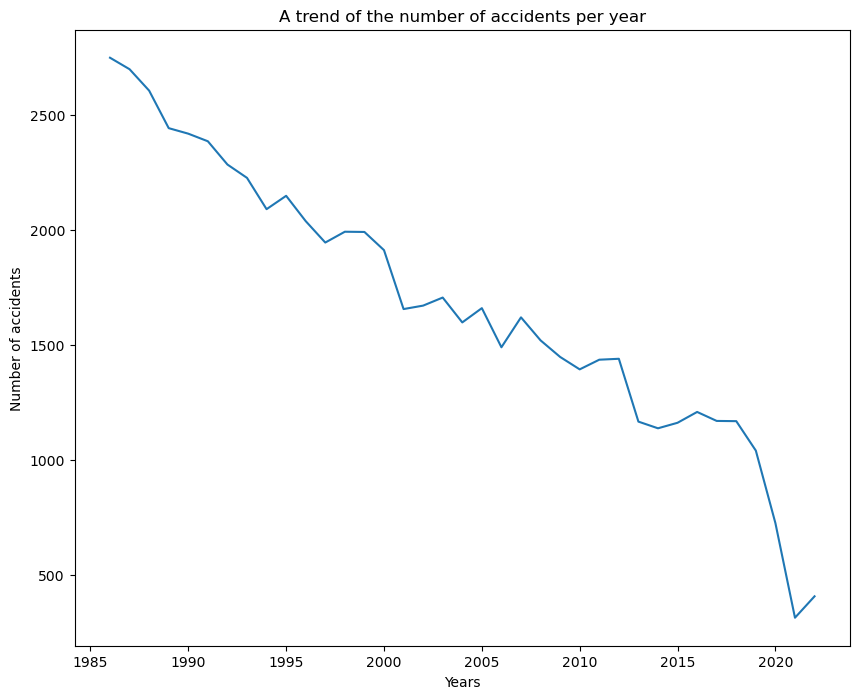

In [179]:
#plot a line graph that shows the trend of accidents overtime
#I included the years from 1982 moving forward as before there were not many flights
x = years
y = number_of_accidents_per_year
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(x,y)
ax.set_xlabel('Years')
ax.set_ylabel('Number of accidents')
ax.set_title('A trend of the number of accidents per year')
plt.show();

## Purpose of the flight vs the number of accidents

In [181]:
Counts_of_accidents = df_cleaned['Purpose Of Flight'].value_counts()
purpose_of_flight = Counts_of_accidents.index


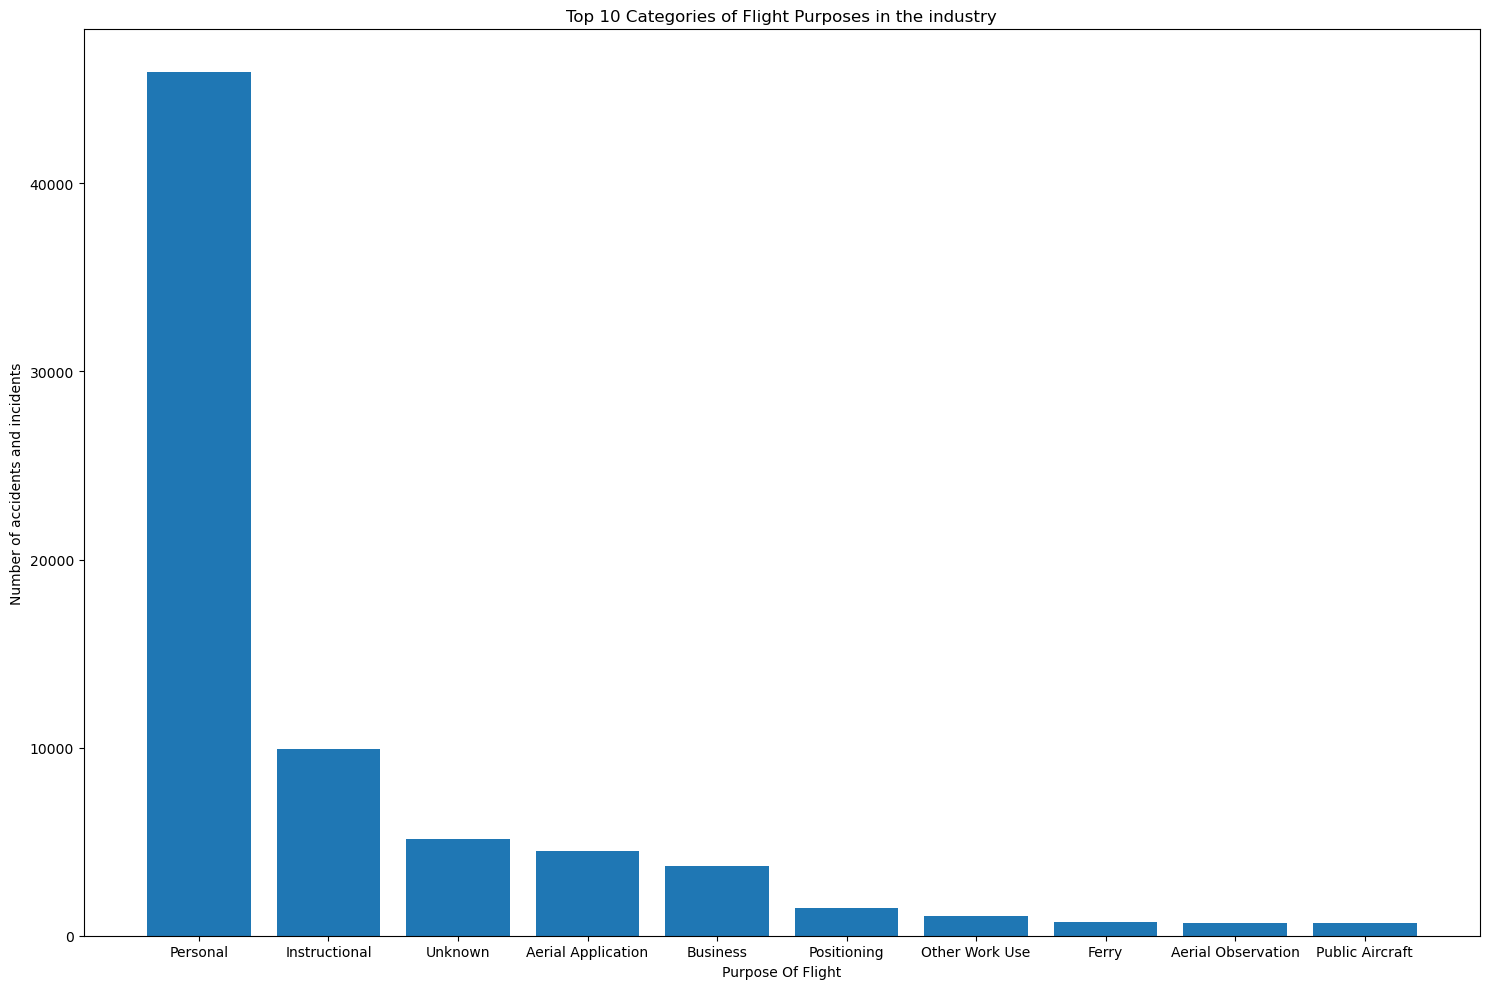

In [182]:
fig,ax = plt.subplots(figsize = (15,10))
fig.set_tight_layout(True)
ax.bar(purpose_of_flight[:10],Counts_of_accidents[:10])
ax.set_xlabel('Purpose Of Flight')
ax.set_ylabel('Number of accidents and incidents')
ax.set_title('Top 10 Categories of Flight Purposes in the industry')
plt.show();

## What are the top 10 makes with most accidenta Accidents and Incidents

In [184]:
Counts_of_accidents_incidents = df_cleaned['Make'].value_counts()
Make_of_Aircraft = Counts_of_accidents_incidents.index
print(Counts_of_accidents_incidents)
print(Make_of_Aircraft)

Make
Cessna               24932
Piper                13739
Beech                 4772
Bell                  2107
Mooney                1254
                     ...  
C.B. Withun              1
Reinhold                 1
Zeidler                  1
W.S. Bowers, Jr.         1
Stephen J Hoffman        1
Name: count, Length: 6884, dtype: int64
Index(['Cessna', 'Piper', 'Beech', 'Bell', 'Mooney', 'Grumman', 'Bellanca',
       'Robinson', 'Hughes', 'Boeing',
       ...
       'The Old Hen Crow', 'Horner-Ryan', 'Ilyushin', 'Tomschin',
       'Becker Wag Aero', 'C.B. Withun', 'Reinhold', 'Zeidler',
       'W.S. Bowers, Jr.', 'Stephen J Hoffman'],
      dtype='object', name='Make', length=6884)


## The top 10 Makes with most accidents

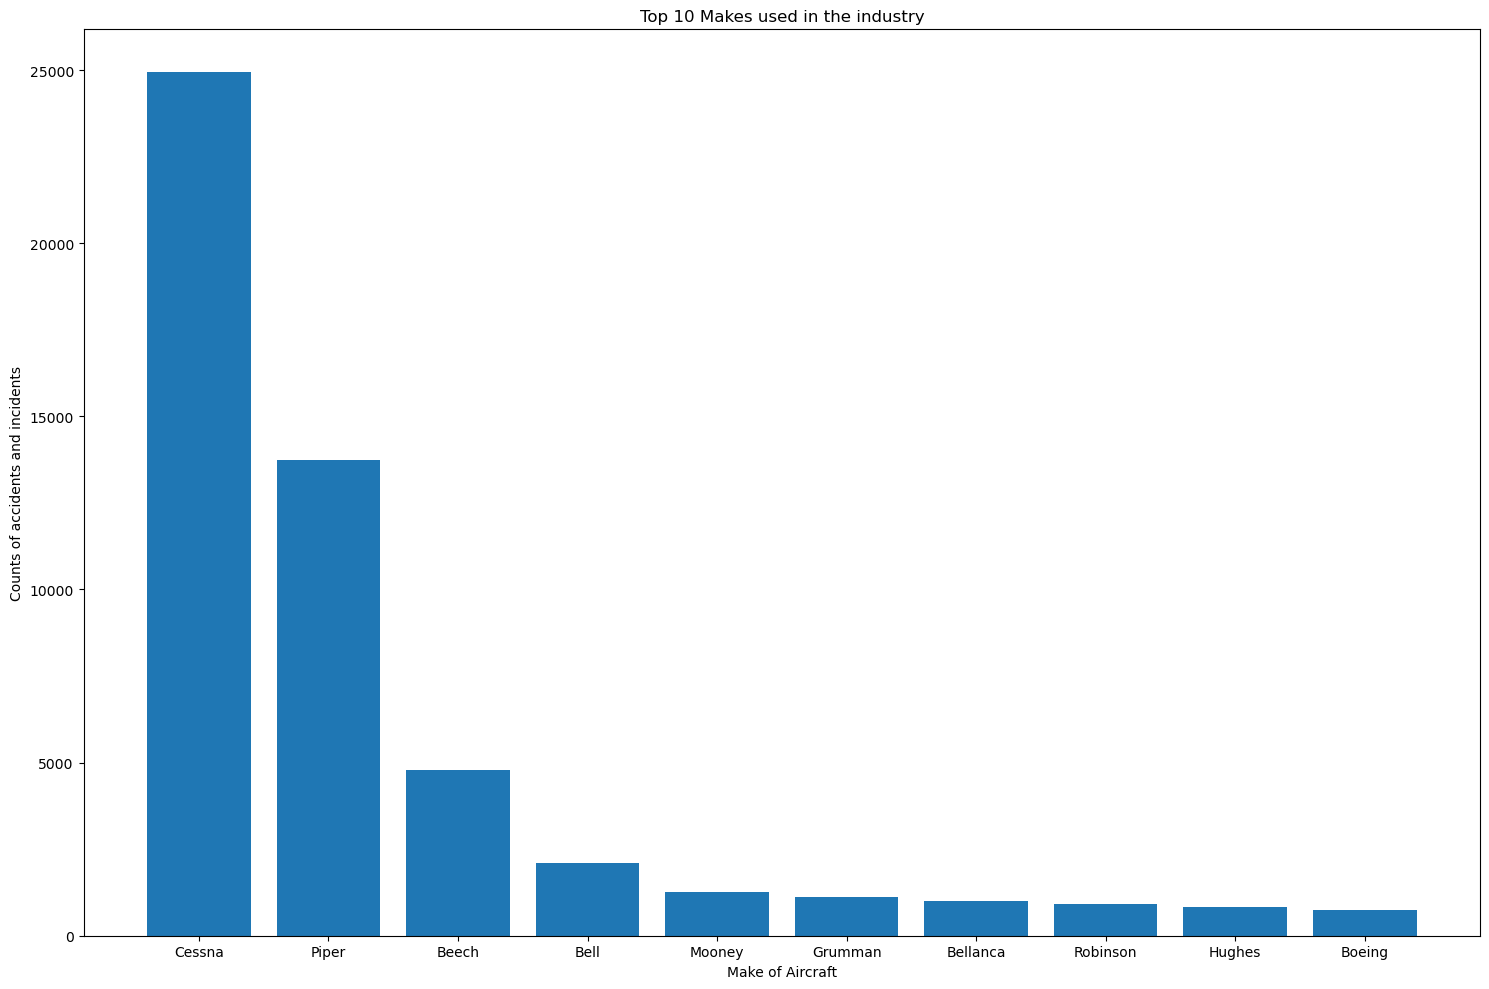

In [186]:
fig,ax = plt.subplots(figsize = (15,10))
fig.set_tight_layout(True)
ax.bar(Make_of_Aircraft[:10],Counts_of_accidents_incidents[:10])
ax.set_xlabel('Make of Aircraft')
ax.set_ylabel('Counts of accidents and incidents')
ax.set_title('Top 10 Makes used in the industry')
plt.show();

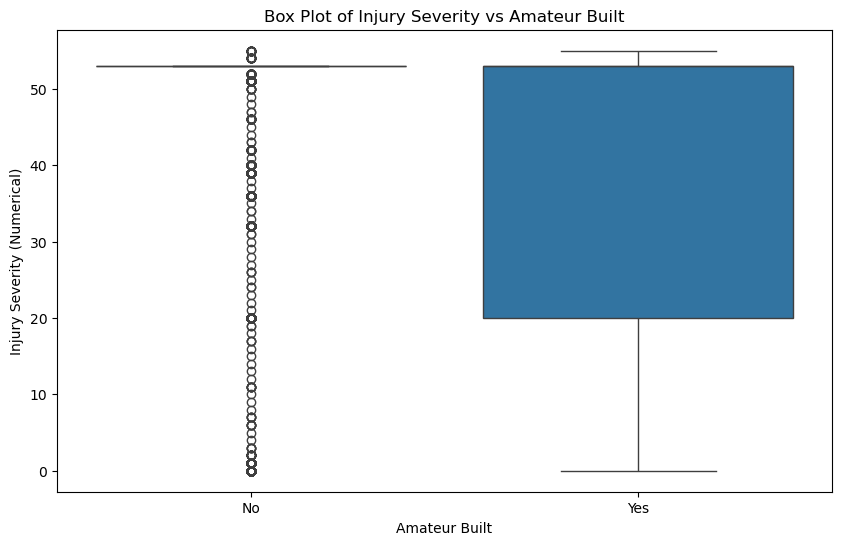

In [187]:
# Convert 'Injury Severity' from categorical data to numerical values
df_cleaned['Injury Severity Numeric'] = pd.Categorical(df_cleaned['Injury Severity']).codes
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create the box plot using the ax object
sns.boxplot(x='Amateur Built', y='Injury Severity Numeric', data=df_cleaned, ax=ax)

# Set title and labels using the ax object
ax.set_title('Box Plot of Injury Severity vs Amateur Built')
ax.set_xlabel('Amateur Built')
ax.set_ylabel('Injury Severity (Numerical)')
plt.show();

In [188]:
'''
For Non-Amateur-Built (No): The many dots suggest a concentration of similar injury severity levels, which indicates low variability and potentially similar factors contributing to those injuries.
For Amateur-Built (Yes): The box plot indicates a wider range of injury severity, suggesting more diverse outcomes, possibly due to differences in construction quality, design, or other factors that affect safety.
'''

'\nFor Non-Amateur-Built (No): The many dots suggest a concentration of similar injury severity levels, which indicates low variability and potentially similar factors contributing to those injuries.\nFor Amateur-Built (Yes): The box plot indicates a wider range of injury severity, suggesting more diverse outcomes, possibly due to differences in construction quality, design, or other factors that affect safety.\n'

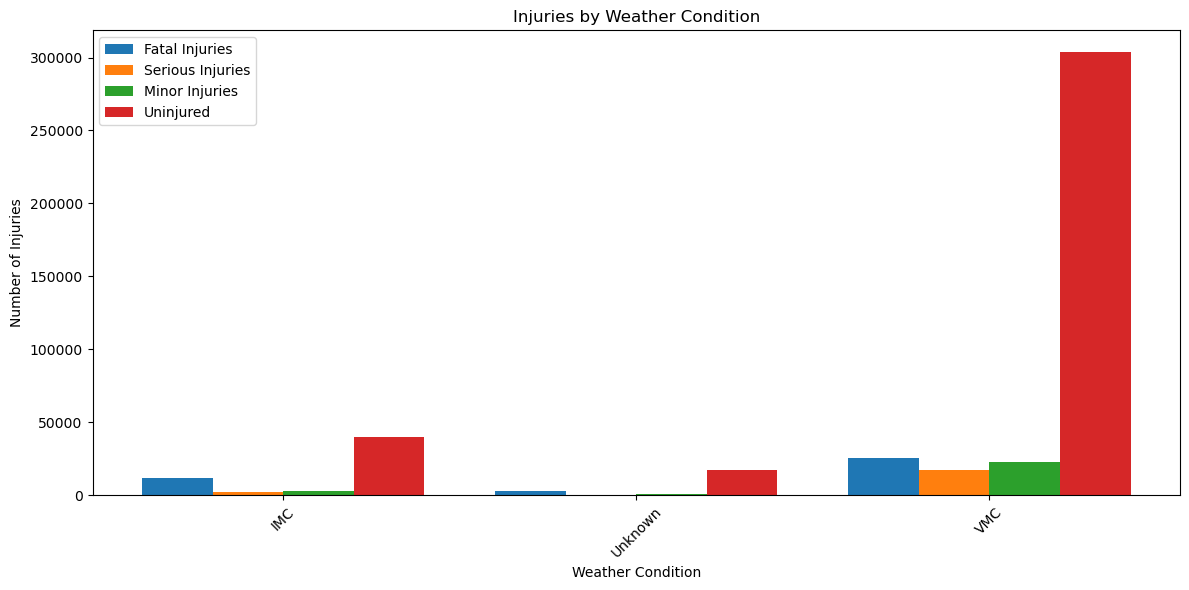

In [189]:
# Grouping data by 'Weather Condition' and summing up injury counts
injuries_by_weather = df.groupby('Weather Condition')[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].sum()

# Defining the number of bars per weather condition and their positions
bar_width = 0.2
index = np.arange(len(injuries_by_weather))

# Creating subplots for each injury type side by side
plt.figure(figsize=(12, 6))

# Plot each injury type next to each other
plt.bar(index, injuries_by_weather['Total Fatal Injuries'], bar_width, label='Fatal Injuries')
plt.bar(index + bar_width, injuries_by_weather['Total Serious Injuries'], bar_width, label='Serious Injuries')
plt.bar(index + 2 * bar_width, injuries_by_weather['Total Minor Injuries'], bar_width, label='Minor Injuries')
plt.bar(index + 3 * bar_width, injuries_by_weather['Total Uninjured'], bar_width, label='Uninjured')

# Adding labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Number of Injuries')
plt.title('Injuries by Weather Condition')
plt.xticks(index + bar_width * 1.5, injuries_by_weather.index, rotation=45)

# Adding a legend
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

## weather condition vs Total Fatal Injuries

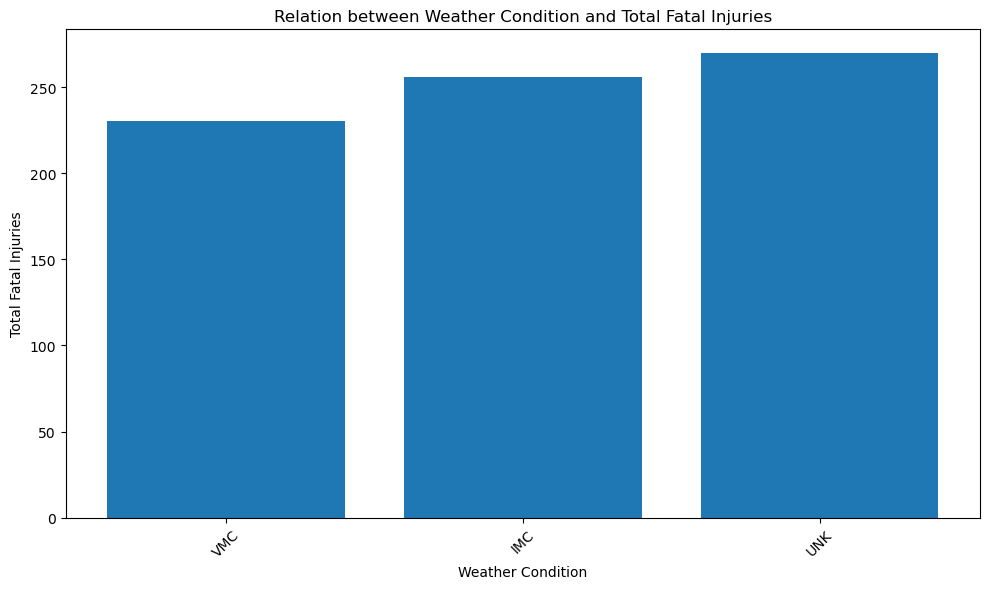

In [191]:
df_cleaned['Weather Condition'] = df_cleaned['Weather Condition'].replace('Unk', 'UNK')

weather_condition = df_cleaned['Weather Condition']  # Column for weather conditions
accidents = df_cleaned['Total Fatal Injuries']       # Column for the number of accidents (total fatal injuries)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar plot
ax.bar(weather_condition, accidents)  # Correctly using the variable names

# Set labels and title

ax.set_xlabel('Weather Condition')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title('Relation between Weather Condition and Total Fatal Injuries')

# Rotate x-axis labels if weather conditions are categorical and long
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

## Risk Analysis based on the Engine Type

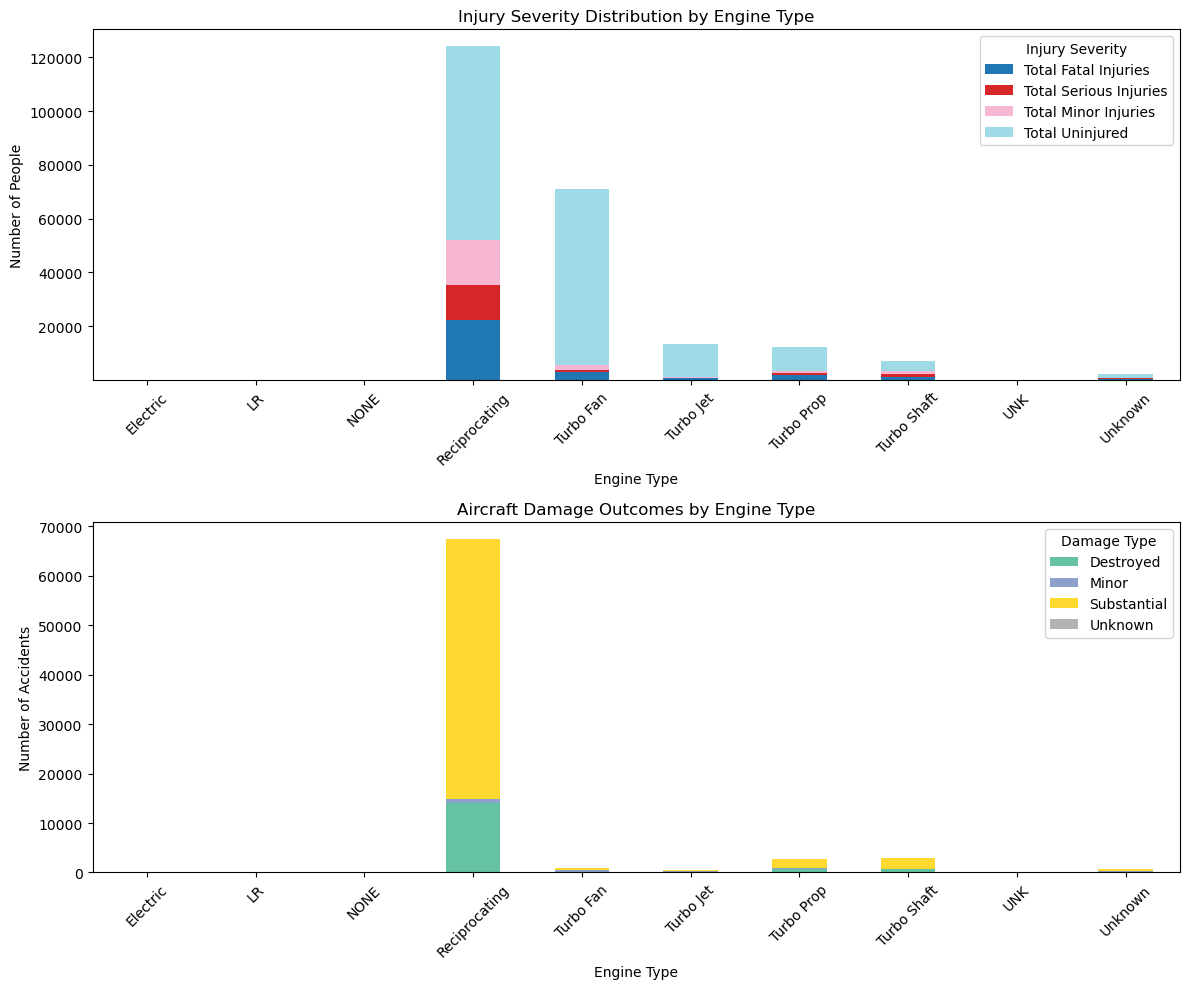

In [193]:
# Grouping data by 'Engine Type' and aggregating injury severities and accident outcomes
engine_type_analysis = df_cleaned.groupby('Engine Type')[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].sum()

# Adding counts of damage types per engine type
damage_by_engine_type = df_cleaned.groupby('Engine Type')['Aircraft Damage'].value_counts().unstack().fillna(0)

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plotting the injury severity distribution as a stacked bar plot
engine_type_analysis.plot(kind='bar', stacked=True, ax=ax1, colormap='tab20')

# Adding labels and title for the first subplot
ax1.set_title('Injury Severity Distribution by Engine Type')
ax1.set_xlabel('Engine Type')
ax1.set_ylabel('Number of People')
ax1.legend(title='Injury Severity')
ax1.set_xticklabels(engine_type_analysis.index, rotation=45)

# Plotting the aircraft damage outcomes as a stacked bar plot
damage_by_engine_type.plot(kind='bar', stacked=True, ax=ax2, colormap='Set2')

# Adding labels and title for the second subplot
ax2.set_title('Aircraft Damage Outcomes by Engine Type')
ax2.set_xlabel('Engine Type')
ax2.set_ylabel('Number of Accidents')
ax2.legend(title='Damage Type')
ax2.set_xticklabels(damage_by_engine_type.index, rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()



In [194]:
'''
###Key Insights:
Reciprocating Engines Show Higher Risk:
Both in terms of human injuries and aircraft damage, reciprocating engines seem to be associated with more severe accidents. This may suggest that they carry a higher operational risk compared to other engine types (e.g., turbine engines).
Turbine or Jet Engines May Be Safer (if present in the dataset):
If turbine-powered engines show fewer fatalities and less aircraft destruction, this suggests they may be safer options for commercial or private operations, depending on the data.

###Actionable Insights for the Aviation Division:
Focus on Turbine or Modern Engines:
Given the higher risks associated with reciprocating engines, the company may want to prioritize aircraft with turbine or jet engines, which could offer better safety outcomes.
Risk Mitigation Strategies:
If the business does intend to operate aircraft with reciprocating engines, additional risk mitigation strategies should be considered, such as enhanced pilot training, stricter maintenance protocols, or operating under more favorable weather conditions.
In summary, reciprocating engines, based on this analysis, seem to present higher risk both in terms of injury and damage severity, making them less desirable for minimizing operational risks in this new aviation venture.
'''

'\n###Key Insights:\nReciprocating Engines Show Higher Risk:\nBoth in terms of human injuries and aircraft damage, reciprocating engines seem to be associated with more severe accidents. This may suggest that they carry a higher operational risk compared to other engine types (e.g., turbine engines).\nTurbine or Jet Engines May Be Safer (if present in the dataset):\nIf turbine-powered engines show fewer fatalities and less aircraft destruction, this suggests they may be safer options for commercial or private operations, depending on the data.\n\n###Actionable Insights for the Aviation Division:\nFocus on Turbine or Modern Engines:\nGiven the higher risks associated with reciprocating engines, the company may want to prioritize aircraft with turbine or jet engines, which could offer better safety outcomes.\nRisk Mitigation Strategies:\nIf the business does intend to operate aircraft with reciprocating engines, additional risk mitigation strategies should be considered, such as enhanced

## What is survivability Rates by Aircraft Make and Model?
Purpose: To identify which makes and models have higher accident survivability rates.


                    Make         Model Survivability Rate
7686  Holsclaw Francis E    STARDUSTER                1.0
7801                Huff        SA-300                1.0
7844              Hughes    500C/369HS                1.0
7841              Hughes          500A                1.0
7840              Hughes         500-D                1.0
7839              Hughes     500-369HS                1.0
7836              Hughes   369HS/H-500                1.0
7829              Hughes    369D (500)                1.0
7825              Hughes  369A (OH-6A)                1.0
7823              Hughes      369-500D                1.0
7820              Hughes          300C                1.0
7817              Hughes      300-269B                1.0
7815              Hughes          269D                1.0
7811              Hughes        269A1A                1.0
7807              Hughes         269-C                1.0


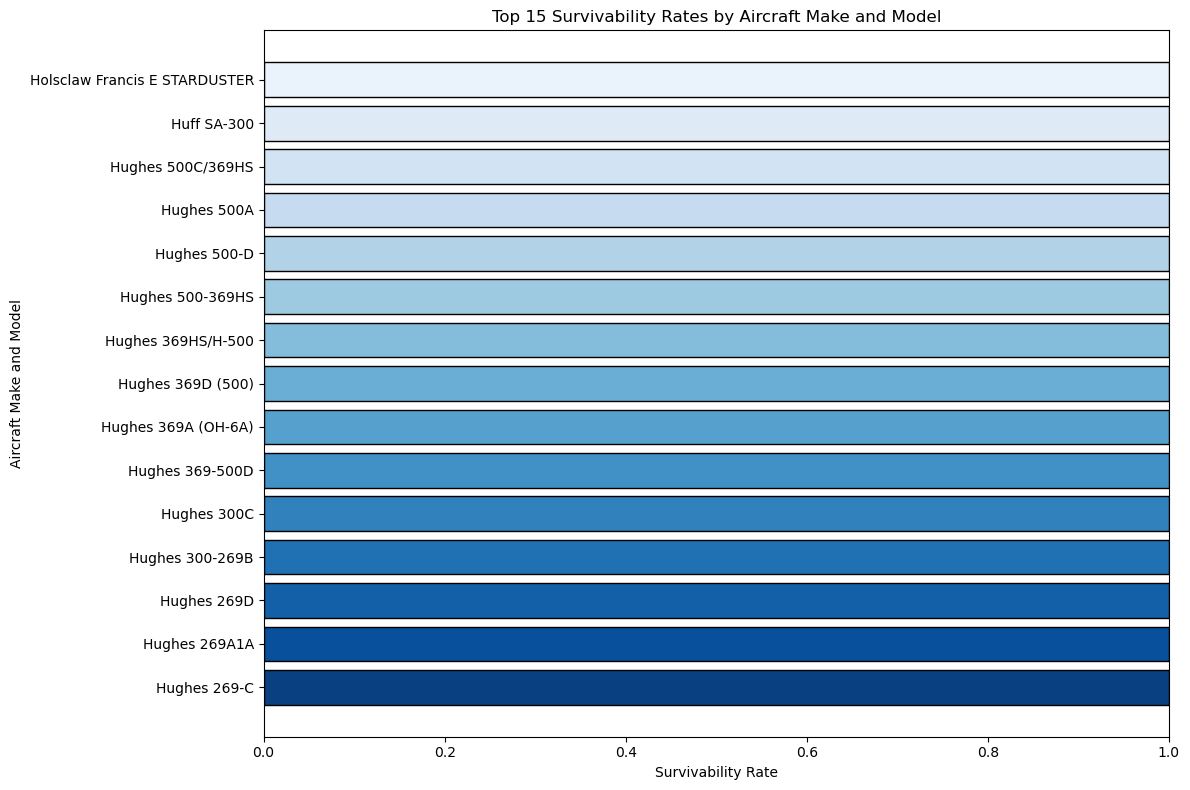

In [264]:
# Step 1: Calculate total passengers involved in each accident
df_cleaned['Total Passengers'] = df_cleaned[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].sum(axis=1)

# Step 2: Calculate survivability rate as Total Uninjured / Total Passengers
df_cleaned['Survivability Rate'] = df_cleaned['Total Uninjured'] / df_cleaned['Total Passengers'].replace(0, pd.NA)

# Step 3: Group by 'Make' and 'Model' to get average survivability rates for each combination
survivability_by_make_model = df_cleaned.groupby(['Make', 'Model'])['Survivability Rate'].mean().reset_index()

# Step 4: Sort by survivability rate in descending order to find the best-performing makes and models
survivability_by_make_model_sorted = survivability_by_make_model.sort_values(by='Survivability Rate', ascending=False)

# Step 5: Select the top 15 makes and models with the highest survivability rates
top_15_survivability = survivability_by_make_model_sorted.head(15)
# Step 6: Create subplots for visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Step 7: Create a color gradient based on survivability rates
colors = sns.color_palette("Blues", n_colors=len(top_15_survivability))

# Step 8: Bar plot of survivability rates by top 15 aircraft make and model
bars = ax.barh(top_15_survivability['Make'] + ' ' + top_15_survivability['Model'], 
                top_15_survivability['Survivability Rate'], 
                color=colors)

# Optional: Add edge color
for bar in bars:
    bar.set_edgecolor('black')

# Add labels and title
ax.set_xlabel('Survivability Rate')
ax.set_ylabel('Aircraft Make and Model')
ax.set_title('Top 15 Survivability Rates by Aircraft Make and Model')
ax.set_xlim(0, 1)  # Survivability rates range between 0 and 1
ax.invert_yaxis()  # Invert y-axis to have highest survivability on top

# Step 9: Display the plot
plt.tight_layout()
plt.show()


In [197]:
'''
Actionable Insight: The head of aviation can use this data to prioritize purchasing aircraft with
a proven track record of passenger safety in the event of an accident.
'''

'\nActionable Insight: The head of aviation can use this data to prioritize purchasing aircraft with\na proven track record of passenger safety in the event of an accident.\n'